In [15]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import time
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
# Prepare dataset
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=0.1307,std=0.3081)])

train_set = torchvision.datasets.MNIST(root = "./dataset",train=True,download=False,transform=transform)  #Make download == True to download dataset
test_set = torchvision.datasets.MNIST(root ="./dataset",train=False,download=False,transform=transform)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32,shuffle=True,num_workers=4)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=32,shuffle=True,num_workers=4)

In [4]:
data__ = enumerate(train_loader)
batch_id , (images,labels) = next(data__)

In [5]:
images.shape

torch.Size([32, 1, 28, 28])

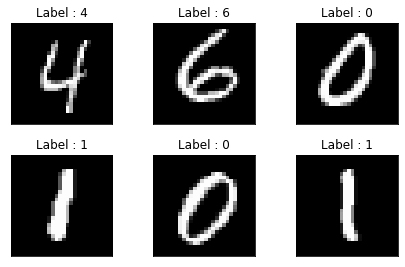

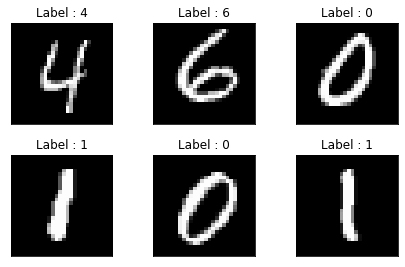

In [6]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Label : {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [7]:
# Function Template 

"""
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=____, out_channels=____, kernel_size=____, padding=____)
        self.conv2 = nn.Conv2d(in_channels=____, out_channels=____, kernel_size=____, padding=____)
        
        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(____, ____)
        
        # Instantiate a fully connected layer
        self.fc = nn.Linear(____, ____)
"""

'\nclass Net(nn.Module):\n    def __init__(self):\n        super(Net, self).__init__()\n        \n        # Instantiate two convolutional layers\n        self.conv1 = nn.Conv2d(in_channels=____, out_channels=____, kernel_size=____, padding=____)\n        self.conv2 = nn.Conv2d(in_channels=____, out_channels=____, kernel_size=____, padding=____)\n        \n        # Instantiate a max pooling layer\n        self.pool = nn.MaxPool2d(____, ____)\n        \n        # Instantiate a fully connected layer\n        self.fc = nn.Linear(____, ____)\n'

In [8]:
# Building neural net
class Net(nn.Module):
    def __init__(self,num_classes=10):
        super(Net,self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Instantiate a fully connected layer
        self.fc1 = nn.Linear(7 * 7 * 10, 100)
        self.fc2 = nn.Linear(100,num_classes)
    
    def forward(self,x):
        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7*7*10)
        x = self.fc1(x)

        # Apply the fully connected layer and return the result
        return self.fc2(x)

# To calculate output size use formula (W - K + 2P/S) + 1
# image dimension is 28 * 28 * 1
# W = 28 , K = 3 , P = 1 , S = 1
# after con1 , output size is 28*28*5
# after first maxpool, output size is 14*14*5
# after conv2, output size is 14*14*10
# after second maxpool , output size is 7*7*10

# NOTE : For maxpool use same formula, just replace kernel with maxpool size

In [56]:
# Training nn

model = Net()
model.to(device) # transfer to GPU if available
optimizer = torch.optim.Adam(model.parameters(),lr=3e-4)
calculate_loss = nn.CrossEntropyLoss()

num_epochs = 1

since = time.time()

gradien_vector = []
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    #scheduler.step()
    model.train()
    running_loss = 0.0
    tk0 = tqdm(train_loader, total=int(len(train_loader)))
    counter = 0



    # Training Code start 
    for batch_idx, data_set in enumerate(tk0):

        optimizer.zero_grad()  # Clear the old gradients from last step  
        data , labels = data_set
        data = data.to(device)
        labels = labels.to(device)
        output = model(data)   #forward
        output.to(device)
        loss = calculate_loss(output,labels) #calculate loss
        loss.backward()
        optimizer.step()

        # Training code ends



        running_loss += loss.item() * data.size(0)
        counter += 1
        tk0.set_postfix(loss=(running_loss / (counter * train_loader.batch_size)))
    
    #Gradients
    for name, param in model.named_parameters():
        if param.requires_grad:
            print (name, param.grad.data)
            gradien_vector.append(param.grad.data)

    
    # #weights
    # for name, param in model.named_parameters():
    #     if param.requires_grad:
    #         print (name, param.data)
    

time_elapsed = time.time() - since
print('\nTraining completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        


Epoch 0/0
----------



conv1.weight tensor([[[[ 0.0002,  0.0089,  0.0256],
          [ 0.0263,  0.0222,  0.0233],
          [ 0.0321,  0.0162,  0.0406]]],


        [[[-0.0236, -0.0178,  0.0169],
          [-0.0012, -0.0181, -0.0208],
          [-0.0159, -0.0239, -0.0046]]],


        [[[ 0.1063,  0.0082, -0.0392],
          [ 0.1172,  0.0543, -0.0378],
          [ 0.0650,  0.0390, -0.0131]]],


        [[[-0.0039,  0.0196,  0.0253],
          [-0.0016,  0.0211,  0.0237],
          [-0.0176,  0.0002, -0.0028]]],


        [[[ 0.0425,  0.0592,  0.0618],
          [ 0.0382,  0.0476,  0.0343],
          [ 0.0225,  0.0365,  0.0083]]]], device='cuda:0')
conv1.bias tensor([ 0.0048,  0.0205,  0.0310,  0.0206, -0.0282], device='cuda:0')
conv2.weight tensor([[[[ 2.3412e-02,  2.4012e-02,  9.8872e-03],
          [ 4.5605e-02,  3.0202e-02,  6.4634e-03],
          [ 3.5093e-02,  3.4783e-02,  1.2056e-02]],

         [[ 7.9032e-03,  8.8035e-03,  8.1229e-03],
          [ 1.7944e-02,  4.0761e-03, -2.3840e-03],
          [ 1

In [10]:
    # Predicting

    correct, total = 0 , 0
    predictions = []
    model.eval()

    for i, data_set in enumerate(test_loader):
        data, labels = data_set
        data, labels = data.to(device), labels.to(device)
        output = model(data)
        _, predicted = torch.max(output.data,1)
        predictions.append(output)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))


The testing set accuracy of the network is: 98 %


In [44]:
gradien_vector
xx = np.array(gradien_vector)

In [45]:
y = xx.ravel()

16

In [48]:
y

array([tensor([[[[-0.0042, -0.0096, -0.0141],
          [-0.0085, -0.0287, -0.0231],
          [-0.0134, -0.0344, -0.0250]]],


        [[[-0.0371, -0.0659, -0.0508],
          [-0.0266, -0.0465, -0.0416],
          [-0.0127, -0.0292, -0.0364]]],


        [[[ 0.0120,  0.0093,  0.0109],
          [ 0.0062,  0.0116,  0.0131],
          [ 0.0008,  0.0030,  0.0089]]],


        [[[-0.0460, -0.0303, -0.0178],
          [-0.0507, -0.0466, -0.0226],
          [-0.0483, -0.0493, -0.0397]]],


        [[[-0.0149, -0.0134, -0.0327],
          [-0.0247, -0.0197, -0.0232],
          [-0.0238, -0.0131, -0.0088]]]], device='cuda:0'),
       tensor([-0.0108,  0.0475,  0.0251, -0.0272, -0.0100], device='cuda:0'),
       tensor([[[[-0.0119, -0.0164, -0.0140],
          [-0.0040, -0.0047, -0.0107],
          [-0.0042, -0.0081, -0.0142]],

         [[-0.0137, -0.0139, -0.0116],
          [-0.0069, -0.0065, -0.0070],
          [-0.0036, -0.0042, -0.0059]],

         [[-0.0110, -0.0104, -0.0138],
        